# **FastAPI-Based Sepsis Prediction API: A Machine Learning Approach for Timely Intervention of Sepsis**

Sepsis is a critical, life-threatening condition triggered by the body's response to an infection, causing harm to its own tissues and organs. Characterized by a complex syndrome, its early identification poses challenges due to symptoms that often mimic those of common illnesses like fever and low blood pressure. Leading to significant mortality rates in hospital settings, timely detection and treatment are imperative for enhancing patient outcomes.

## BUSINESS UNDERSTANDING

Recognizing the critical imperative of early detection and intervention in sepsis, a life-threatening condition, the project aims to leverage machine learning and a predictive API deployment. The objective is to furnish healthcare professionals with a tool for identifying at-risk patients. Timely intervention is paramount for improving outcomes and reducing sepsis-associated mortality rates. Thus, the project endeavors to deliver a fast, reliable, and seamlessly integrated solution within existing healthcare workflows. Ultimately, it strives to save lives and enhance patient care quality by enabling informed decisions based on precise sepsis likelihood predictions.

## Dataset Overview
The sepsis dataset comprises patient records with comprehensive clinical features, including:

- **ID**: Unique patient identification number.
- **PRG**: Plasma glucose level.
- **PL**: Blood work result 1 (mu U/ml).
- **PR**: Blood pressure (mm Hg).
- **SK**: Blood work result 2 (mm).
- **TS**: Blood work result 3 (mu U/ml).
- **M11**: Body mass index (weight in kg/(height in m)²).
- **BD2**: Blood work result 4 (mu U/ml).
- **Age**: Patient’s age (years).
- **Insurance**: Indication of whether the patient holds a valid insurance card.
- **Sepsis**: Classification indicating whether the patient has sepsis (Positive) or not (Negative).

##             HYPOTHESIS

* **Null Hypothesis (H0):**
There is no significant relationship between a patient's age and the likelihood of them having sepsis.

* **Alternative Hypothesis (H1):**
There exists a significant relationship between a patient's age and the likelihood of them having sepsis. Specifically, older patients may be more likely to develop sepsis compared to younger patients.

## QUESTIONS

# Analytical Questions

1.  How are the numerical variables correlated with each other?
2.  What is the distribution of ages in the dataset?
3.  How many patients have insurance?
4. How does insurance status relate to the occurrence of Sepsis?
5. How does Pregnancy (PRG) vary with Sepsis?
6. What is the distribution of plasma glucose concentration in the dataset?
7. How does serum insulin (M11) vary between patients with and without sepsis?

In [297]:
%pip install pandas
%pip install python-dotenv
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install plotly
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importation

In [298]:
#install openpyxl to be able to open excel files in python



import pandas as pd
import numpy as np


from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer,LabelEncoder
from sklearn.compose import make_column_selector
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

warnings.filterwarnings('ignore')

## Data Loading

In [299]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./Dataset/Paitients_Files_Train.csv')
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Data understanding & EDA

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [301]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [302]:
df.duplicated().sum()

0

In [303]:
# drop unneeded column
columns_drop = ['ID']
df = df.drop(columns=columns_drop)

In [304]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


### Univariate Analysis

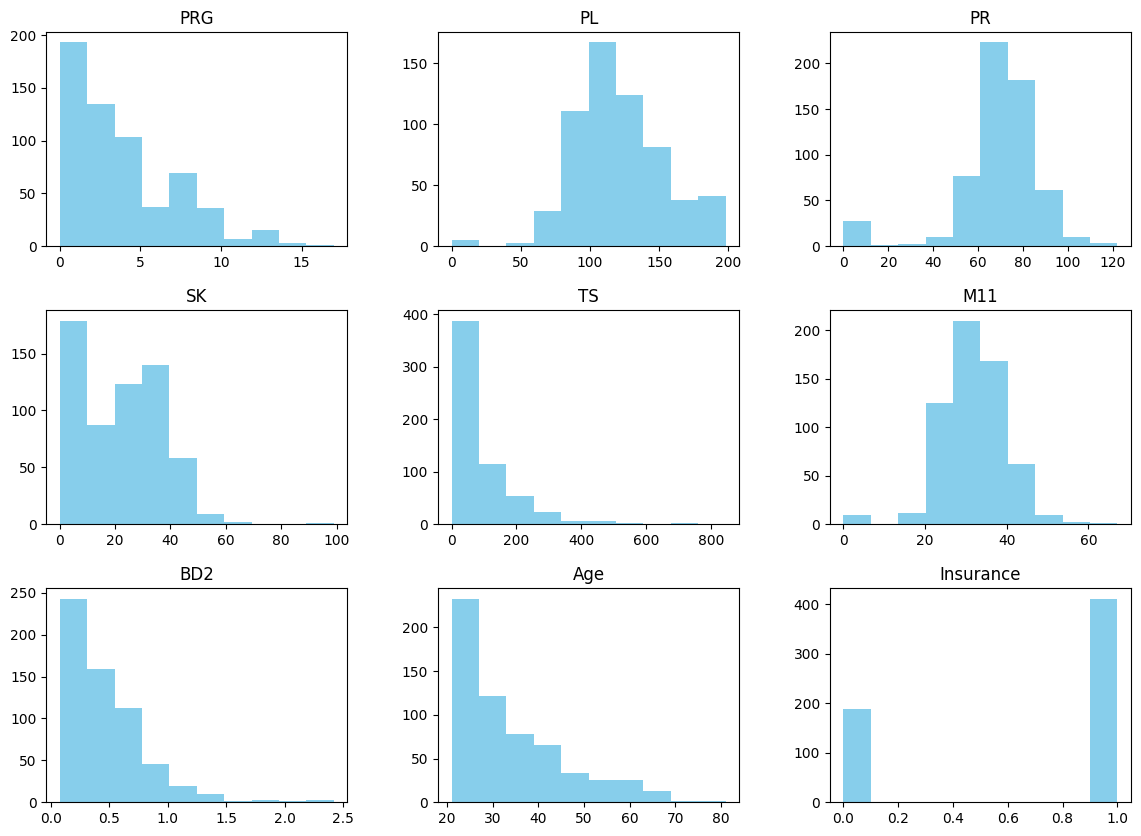

In [305]:
df.hist(figsize=(14, 10), color='skyblue', grid=False)
plt.show()

Skewness of PRG: 0.9140075641129112


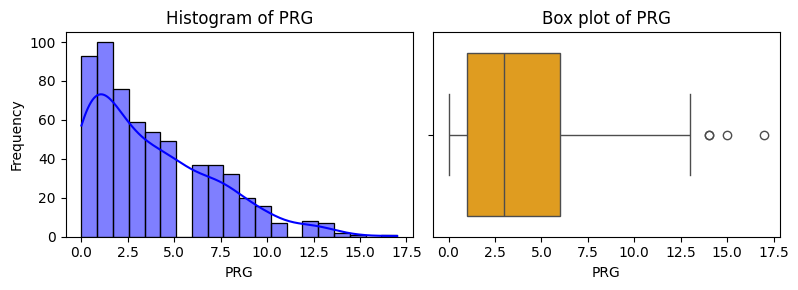

Skewness of PL: 0.11617992575441363


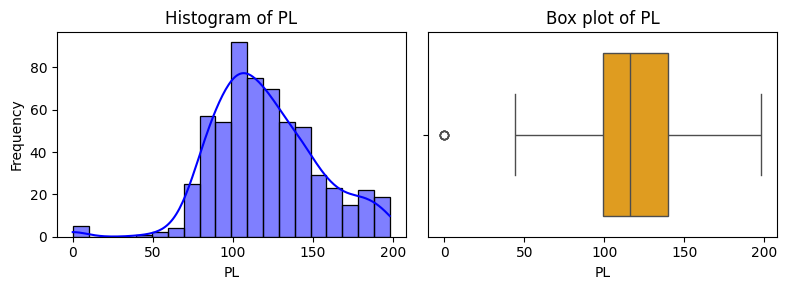

Skewness of PR: -1.8746617025518386


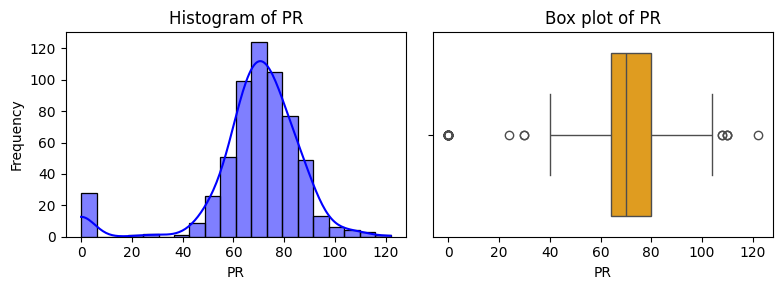

Skewness of SK: 0.1640632678373713


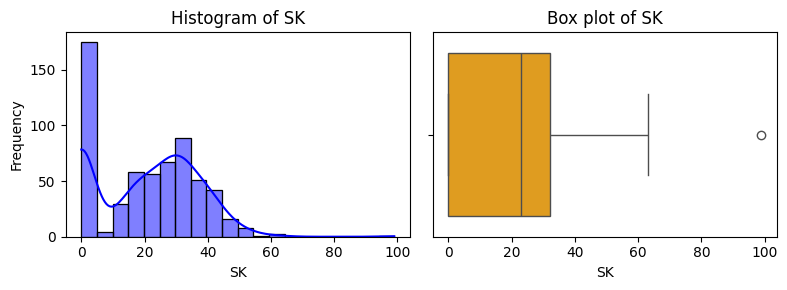

Skewness of TS: 2.401584585533378


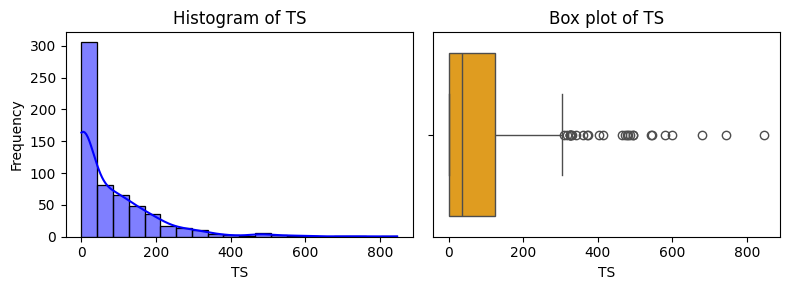

Skewness of M11: -0.40525494504790965


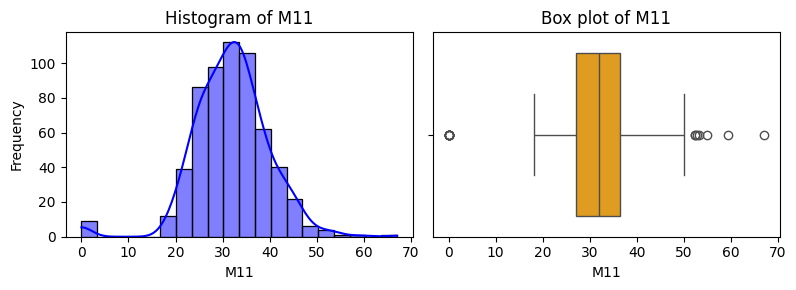

Skewness of BD2: 1.989472326608606


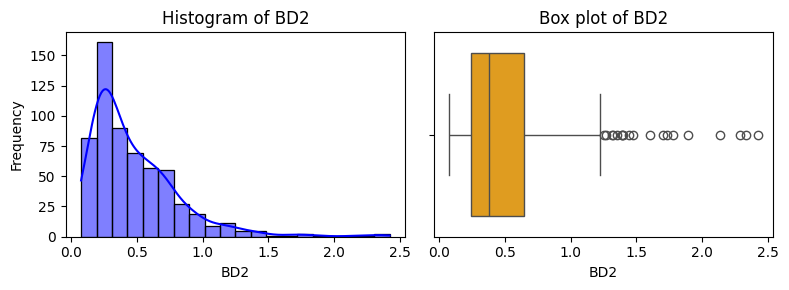

Skewness of Age: 1.1523528641533494


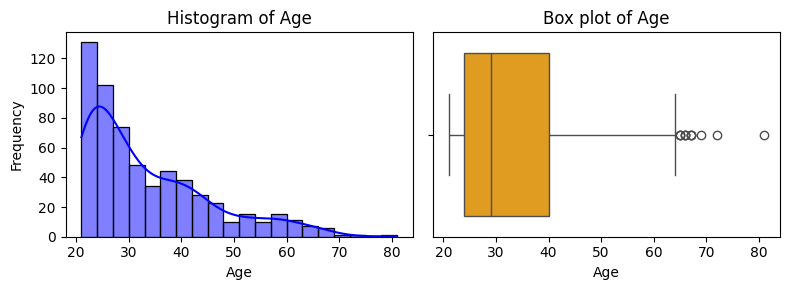

Skewness of Insurance: -0.8042567221912439


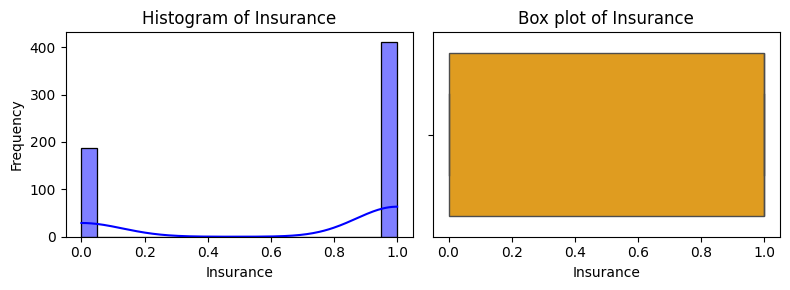

In [306]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for column in numerical_columns:
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, color='Blue', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(False)

    # Box plot
    sns.boxplot(x=df[column], color='Orange', ax=axes[1])
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)
    axes[1].grid(False)

    # Adjust layout
    plt.tight_layout()

    # Skewness
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")

    plt.show()

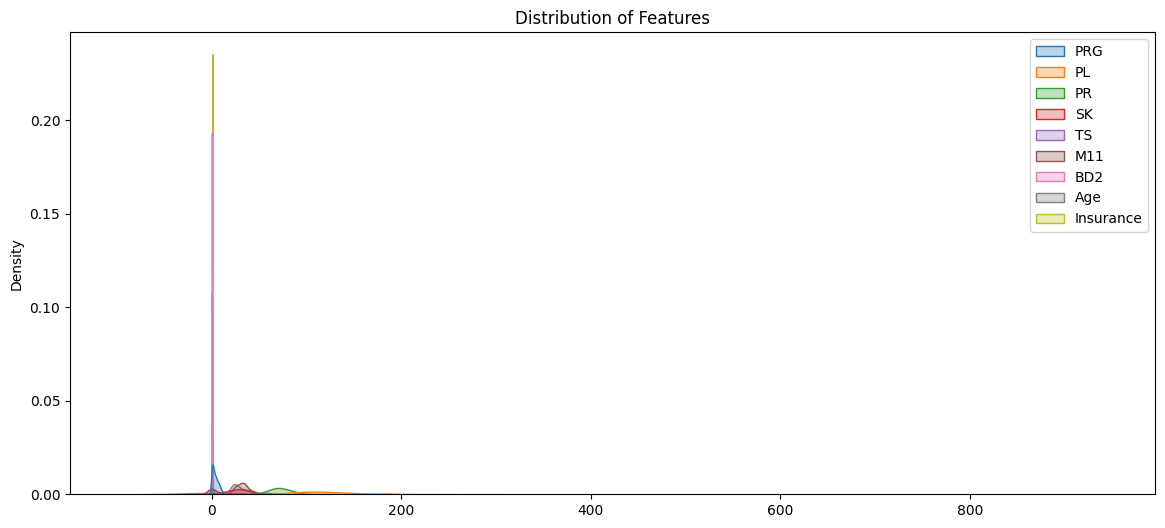

In [307]:
# kdplot plot  Sepssis

plt.figure(figsize=(14,6))
sns.kdeplot(df, fill=True, alpha=0.3)
plt.title('Distribution of Features')
plt.show()

#### **Insights**

### Bivariate Analysis

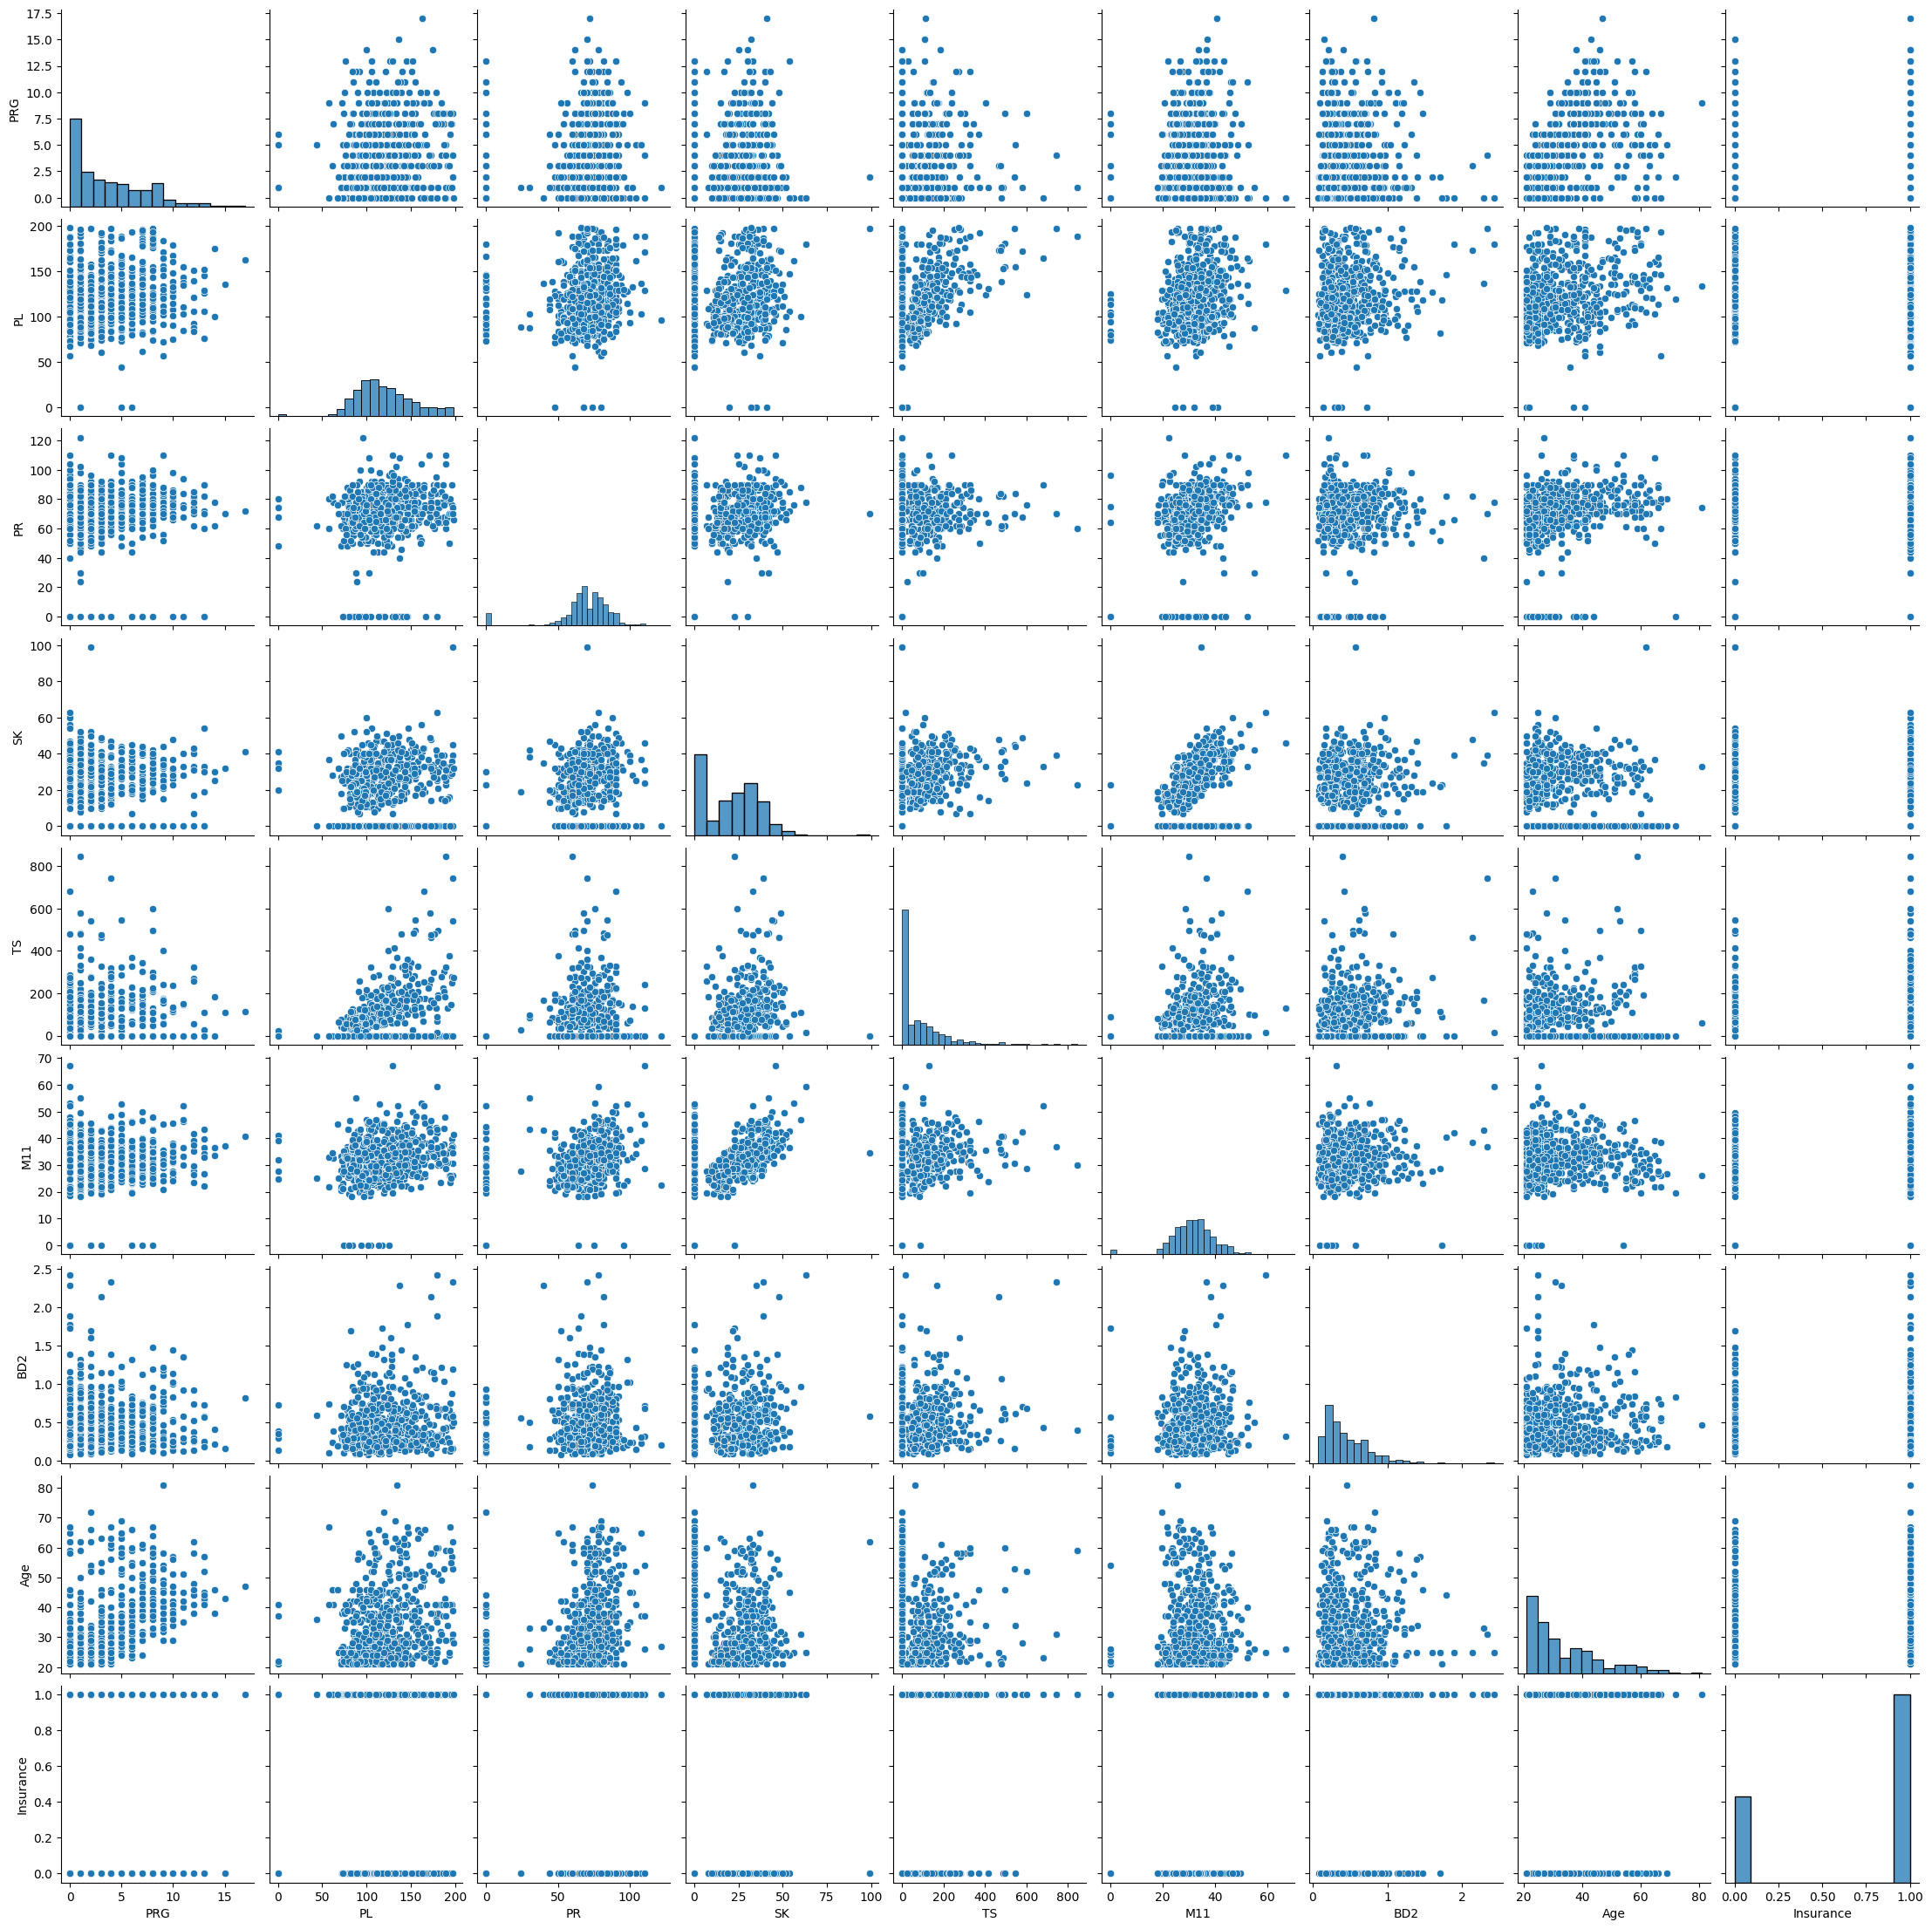

In [308]:
# pairpot plot  Sepssis
taste_df=df
sns.pairplot(taste_df)

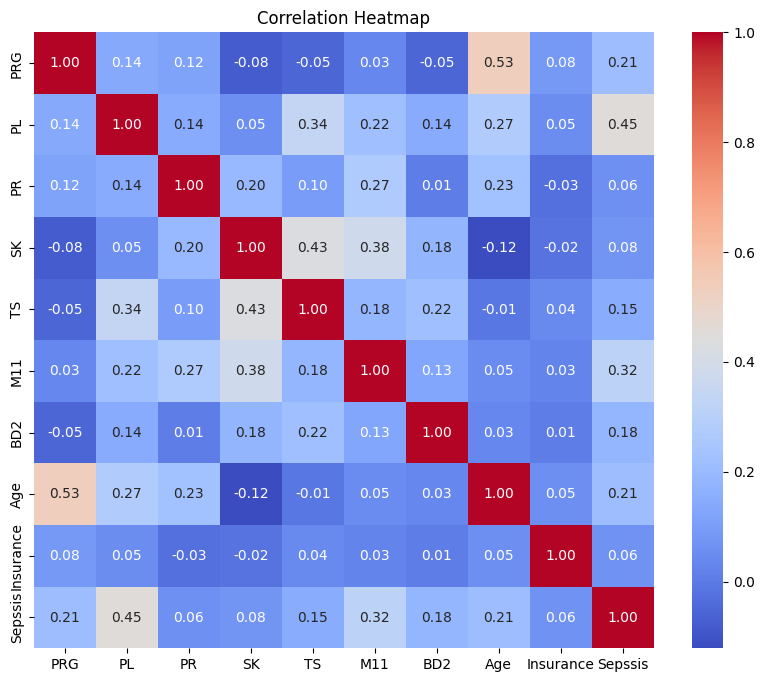

In [309]:
# heatmap plot  Sepssis
# convert Sepsis column to numeric column
df["Sepssis"]= df["Sepssis"].apply(lambda x: 1 if x=="Positive" else 0 )

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



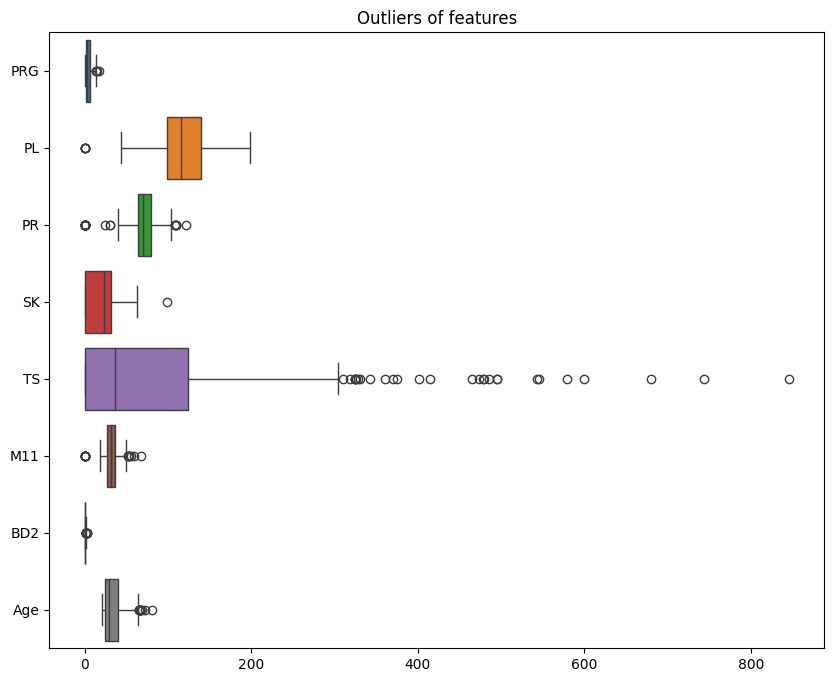

In [310]:
# check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop(['Insurance','Sepssis'],axis=1), orient='h')
plt.title('Outliers of features')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


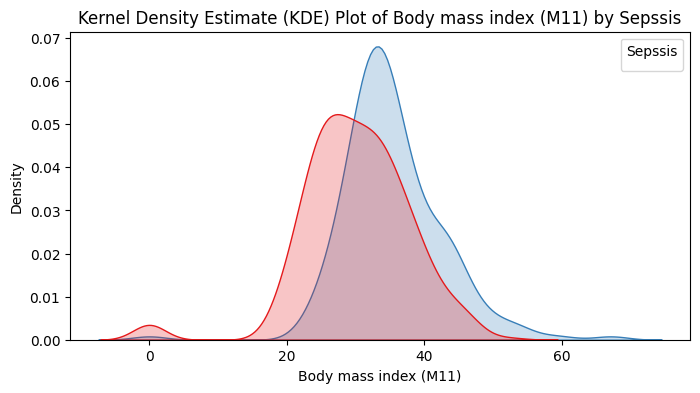

In [311]:
# KDE plot for M11 (Body mass index) by Sepssis
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='M11', hue='Sepssis', fill=True, palette='Set1', common_norm=False)
plt.title('Kernel Density Estimate (KDE) Plot of Body mass index (M11) by Sepssis')
plt.xlabel('Body mass index (M11)')
plt.ylabel('Density')
plt.legend(title='Sepssis')
plt.show()


ANSWERS TO ANALYTICAL QUESTIONS

###### Q1. ANS

In [312]:
# Calculate the count of occurrences of sepsis


# Function to convert 1 to 'Positive' and 0 to 'Negative'
def convert_to_sign(num):
    if num == 1:
        return 'Positive'
    elif num == 0:
        return 'Negative'
    else:
        return 'Invalid input'

# Apply the function to the DataFrame column
df['Sepssis'] = df['Sepssis'].apply(convert_to_sign)



sepsis_counts = df['Sepssis'].value_counts()

sepsis_counts

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

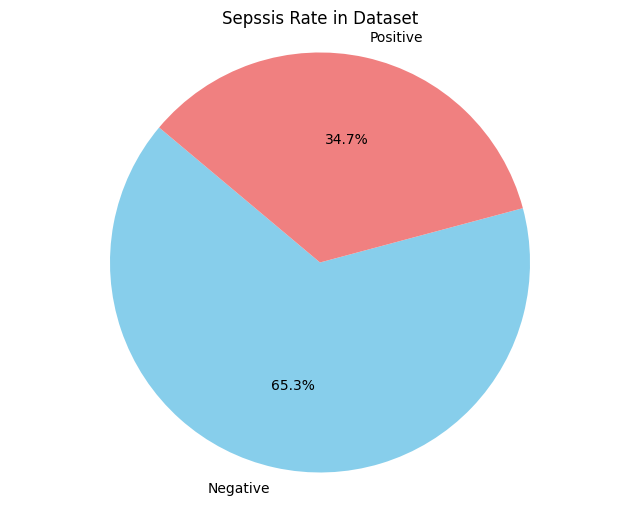

In [313]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sepsis_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Sepssis Rate in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [314]:
# convert Sepsis column to numeric column
df["Sepssis"]= df["Sepssis"].apply(lambda x: 1 if x=="Positive" else 0 )

#### DATA PREPARATION

In [315]:
# Check for Data Balancing
df['Sepssis'].value_counts().rename('Total Count').reset_index()

,Sepssis,Total Count
0,0,391
1,1,208


In [316]:
### imputation

X=df.drop('Sepssis', axis=1)
y=df['Sepssis']

In [317]:
#split dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42,stratify=y)

encoder y-label

In [318]:
# Encode categorical variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)

Create a preprocessor

In [319]:
features = X.columns

features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [320]:
# create preprocessor with transformations to be applied to data
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'),features),
        ('scaler', RobustScaler(),features),
        ('log_transformations', FunctionTransformer(np.log1p),features)
    ]
)

model and evaluation

In [321]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42)),
    ('stochastic_gradient_descent',SGDClassifier(random_state=42))   
]

In [322]:
# view nodels
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)
stochastic_gradient_descent


__Train Unbalanced Data__

In [323]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}

# loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',model)
    ])

    #fit train data to pipeline
    pipeline.fit(X_train,y_train)

    # make prediction on the test set
    y_pred = pipeline.predict(X_test)

    # store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict= True)
    
    #save each pipeline in the loop in the dictionary
    pipelines[model_name]= pipeline

    # get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
metrics_table.sort_values('F1_Score',ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
1,Logistic Regression,0.758333,0.759725,0.758333,0.758975
4,Tree-based (Decision Tree),0.716667,0.711232,0.716667,0.713125
2,Support Vector Machine,0.716667,0.707456,0.716667,0.708665
3,K-Nearest Neighbors,0.683333,0.686962,0.683333,0.684959
0,Random Forest,0.675000,0.673248,0.675000,0.674077
5,stochastic_gradient_descent,0.575000,0.694088,0.575000,0.573908


In [324]:
#view one of the models
pipelines['Logistic Regression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformations',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('feature importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000210946902C0>)),
                ('classifier', LogisticRegression(random_state=42))])

train balance dataet

In [325]:
#create table to store metrics
balanced_metrics_table = pd.DataFrame(columns=['Model name','Precision', 'Recall', 'Accuracy', 'F1-Score'])

# initialise dictionary to store pipelines of balanced data
balanced_pipelines ={}

# loop train models
for model_name, model in models:

    #create pipeline using pipeline module from imblearn
    balanced_pipeline = ImbPipeline (steps = [
        ('preprocessor', preprocessor),
        ('smote',SMOTE(sampling_strategy='auto')),
        ('feature importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', model)

    ])

    # fit train data to pipeline
    balanced_pipeline.fit(X_train,y_train)

    # make prediction usinf test
    y_pred = balanced_pipeline.predict(X_test)

    # store metrics in a dictionary
    balanced_metrics = classification_report(y_test,y_pred, output_dict=True)

    #save each pipeline in the initialised dictionary
    balanced_pipelines[model_name] = pipeline

    #get values from the balanced metric dictionary
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # add these metric values to the table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
balanced_metrics_table.sort_values('F1-Score',ascending=False)

,Model name,Precision,Recall,Accuracy,F1-Score
1,Logistic Regression,0.708333,0.743317,0.708333,0.714915
4,Tree-based (Decision Tree),0.708333,0.709982,0.708333,0.709108
0,Random Forest,0.700000,0.707286,0.700000,0.702871
2,Support Vector Machine,0.683333,0.721746,0.683333,0.690571
5,stochastic_gradient_descent,0.666667,0.693603,0.666667,0.673611
3,K-Nearest Neighbors,0.616667,0.681987,0.616667,0.624411
